# ML Debugging Challenge: Titanic Survival Prediction

Welcome to the ML Debugging Challenge! This notebook contains a complete machine learning pipeline for predicting Titanic passenger survival using Logistic Regression.

**Your Task:** There are **11 bugs** hidden in this pipeline. Find and fix them all!

**Pipeline Steps:**
1. Import Libraries
2. Load Dataset
3. Explore the Data
4. Encode Categorical Features
5. Handle Missing Values
6. Feature Selection
7. Train-Test Split
8. Feature Scaling
9. Model Training
10. Prediction & Evaluation

## Step 0: Installing Libraries
Installing all necessary libraries

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


: 

## Step 1: Import Libraries
Import all necessary libraries for data manipulation, visualization, preprocessing, model training, and evaluation.

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## Step 2: Load the Titanic Dataset
Load the Titanic dataset from a local CSV file.

In [3]:
# Load Titanic dataset from local CSV
df = pd.read_csv('titanic_data.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nTarget variable: 'survived'")
print(f"Target distribution:\n{df['survived'].value_counts()}")

Dataset shape: (1329, 14)

Target variable: 'survived'
Target distribution:
survived
0    822
1    507
Name: count, dtype: int64


## Step 3: Explore the Data
Inspect the dataset structure, data types, and basic statistics to understand what we're working with.

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# Dataset info
print("Dataset Info:")
print(df.info())

print("\n" + "="*50)
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1329 non-null   int64  
 1   survived   1329 non-null   int64  
 2   name       1329 non-null   str    
 3   sex        1329 non-null   str    
 4   age        1062 non-null   float64
 5   sibsp      1329 non-null   int64  
 6   parch      1329 non-null   int64  
 7   ticket     1329 non-null   str    
 8   fare       1328 non-null   float64
 9   cabin      298 non-null    str    
 10  embarked   1327 non-null   str    
 11  boat       493 non-null    str    
 12  body       123 non-null    float64
 13  home.dest  755 non-null    str    
dtypes: float64(3), int64(4), str(7)
memory usage: 145.5 KB
None


Basic Statistics:


,pclass,survived,age,sibsp,parch,fare,body
count,1329.000000,1329.000000,1062.000000,1329.000000,1329.000000,1328.000000,123.000000
mean,2.296464,0.381490,29.941620,0.494357,0.384500,33.423337,159.642276
std,0.837377,0.485935,14.445738,1.035589,0.862768,53.106934,97.351411
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,71.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,153.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,255.500000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
# Check missing values
print("Missing values per column:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Percentage', ascending=False))

Missing values per column:
           Missing Count  Percentage
body                1206   90.744921
cabin               1031   77.577126
boat                 836   62.904439
home.dest            574   43.190369
age                  267   20.090293
embarked               2    0.150489
fare                   1    0.075245


In [7]:
# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    pass
else:
    print("No duplicates found.")

Number of duplicate rows: 20


## Step 4: Encode Categorical Features
Encode string categorical (Nominal) columns to numeric values before handling missing values.

In [8]:
# Ordinal encode
embarked_map = {'C': 1, 'Q': 2, 'S': 3}
df['embarked'] = df['embarked'].map(embarked_map)

sex_map = {'female': 0, 'male': 1}
df['sex'] = df['sex'].map(sex_map)

print("Categorical features encoded.")
print(f"\nEmbarked value counts:\n{df['embarked'].value_counts()}")
print(f"\nSex value counts:\n{df['sex'].value_counts()}")

Categorical features encoded.

Embarked value counts:
embarked
3.0    929
1.0    273
2.0    125
Name: count, dtype: int64

Sex value counts:
sex
1    859
0    470
Name: count, dtype: int64


## Step 5: Handle Missing Values
Fill or drop missing values appropriately for each column.

In [9]:
# Drop columns with too many missing values
df = df.drop(columns=['body', 'cabin', 'boat', 'home.dest'])

# Fill missing values
df['age'] = df['age'].fillna(df['age'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mean())
df['fare'] = df['fare'].fillna(df['fare'].median())

print("Missing values handled.")
print(f"\nMissing values remaining: {df.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df.shape}")

Missing values handled.

Missing values remaining: 0
Dataset shape after cleaning: (1329, 10)


## Step 6: Feature Selection
Select the most relevant features for the model and prepare the feature matrix (X) and target vector (y).

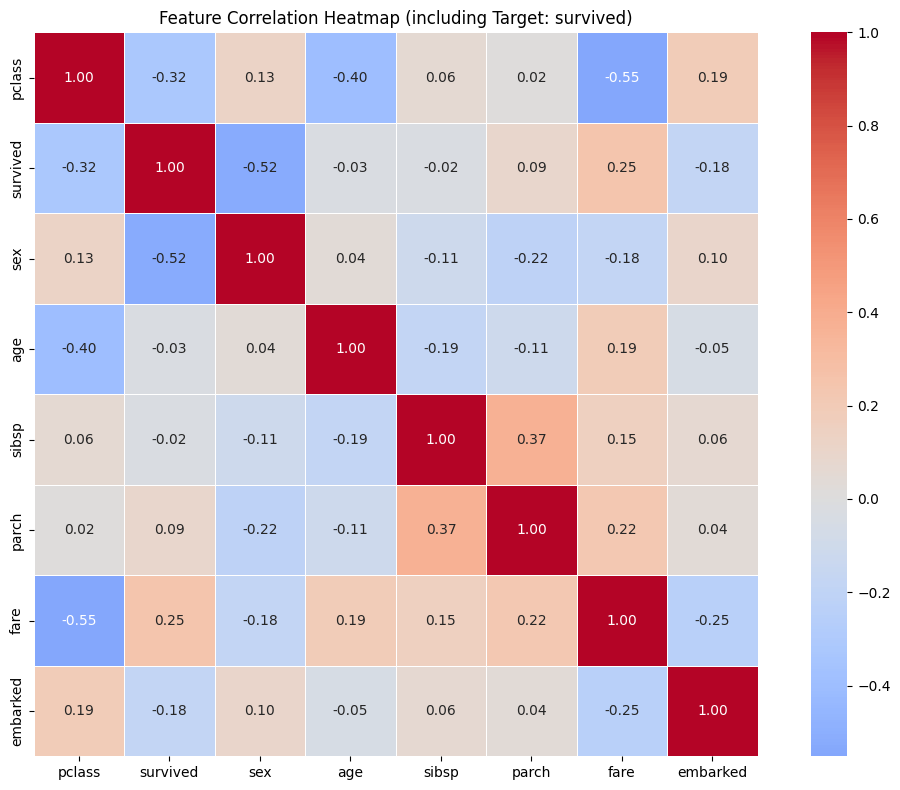

Correlation with target ('survived'):
sex         0.523901
pclass      0.318864
fare        0.247077
embarked    0.180405
parch       0.086318
age         0.028949
sibsp       0.024898
Name: survived, dtype: float64


In [10]:
# Correlation heatmap of all numeric features vs target to identify strong predictors
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(11, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            linewidths=0.5, square=True)
plt.title('Feature Correlation Heatmap (including Target: survived)')
plt.tight_layout()
plt.show()

# Print correlation with target, sorted by strength
print("Correlation with target ('survived'):")
print(corr_matrix['survived'].drop('survived').abs().sort_values(ascending=False))

In [11]:
# Select features for the model
feature_columns = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']
df = df[feature_columns]

X = df[feature_columns]
y = df['survived']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nSelected features: {feature_columns}")
print(f"\nFeature data types:\n{X.dtypes}")

Feature matrix shape: (1329, 7)
Target vector shape: (1329,)

Selected features: ['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']

Feature data types:
pclass        int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked    float64
survived      int64
dtype: object


## Step 7: Train-Test Split
Split the data into training and testing sets. We use 80% for training and 20% for testing.

In [12]:
# Shuffle the data before splitting
X = X.sample(frac=1, random_state=42)   

# Split the data
X_test, X_train, y_test, y_train = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Step 8: Feature Scaling
Standardize the features so they have zero mean and unit variance. This helps Logistic Regression converge faster.

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the training data
X_train = scaler.fit_transform(X_train)
X_test = X_test

print("Feature scaling complete!")

Feature scaling complete!


## Step 9: Model Training
Create and train a Logistic Regression model on the scaled training data.

In [14]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


## Step 10: Prediction & Evaluation
Make predictions on the test set and evaluate the model's performance using various metrics.

In [15]:
# Make predictions
y_pred = (model.predict_proba(X_test)[:, 1] >= 0.67).astype(int)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"Predictions done. Sample predicted probabilities: {y_pred_proba[:5].round(4)}")

Predictions done. Sample predicted probabilities: [0.2017 0.9899 0.3051 0.7174 0.8168]


In [16]:
# Calculate accuracy
accuracy = (y_pred_proba == y_test).sum() / len(y_test) 
print(f"Model Accuracy: {accuracy:.4f}")
print(f"\n{'='*50}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

Model Accuracy: 0.0000

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.59      0.16      0.25       657
    Survived       0.38      0.83      0.52       406

    accuracy                           0.41      1063
   macro avg       0.48      0.49      0.38      1063
weighted avg       0.51      0.41      0.35      1063

